# Project_3: Linear Regressions
## Author: Iman Singh

## Date: 11/5/2017

<p><a name="sections"></a></p>


## Sections

- <a href="#numeric">EDA of Numerics</a><br>
- <a href="#linear1">Linear Regression 1</a><br>
- <a href="#categorical">EDA of Categoricals</a><br>
- <a href="#categorica_engineering">Features Engineering of Select Categoricals</a><br>
- <a href="#linear2">Linear Regression 2</a><br>
- <a href="#VIF1">VIF Analysis of Linear Regression 2 Model</a><br>
- <a href="#linear3">Linear Regression 3</a><br>
- <a href="#linear4">Linear Regression 4</a><br>

In [63]:
#### Loading the packages to be used
from __future__ import print_function 
from pandas.core import datetools
import pandas as pd
import numpy as np
from scipy import stats

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge, Lasso, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from  statsmodels.genmod import generalized_linear_model

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns

from preprocess import impute, derived_vars, interact_vars, select_vars_train, select_vars_test

In [64]:
#read in csv file and create data frame
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
#impute missing variables
train_df_imputed = impute(train_df)
test_df_imputed = impute(test_df)

In [66]:
#add derived variables
train_df_derived = derived_vars(train_df_imputed)
test_df_derived = derived_vars(test_df_imputed)

train_df_derived.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalFinishedSF,HighQualFinishedSF,TotalBaths
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,2566,2416,2566,3.5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,2524,2240,2524,2.5
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,2706,2272,2706,3.5
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,2473,1933,2473,2.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,3343,2853,3343,3.5


In [67]:
#add interactions
train_df_interactions = interact_vars(train_df_derived)
test_df_interactions = interact_vars(test_df_derived)

train_df_interactions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,TotalBaths * TotalSF,OverallQual + OverallCond,BsmtQual + BsmtCond,GarageQual + GarageCond,ExterQual + ExterCond,Heating + HeatingQC,SaleType + SaleCondition,Neighborhood + BldgType + HouseStyle,Neighborhood + Condition1 + Condition2,Neighborhood + OverallQual + OverallCond
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,8981.0,7+5,Gd+TA,TA+TA,Gd+TA,GasA+Ex,WD+Normal,CollgCr+1Fam+2Story,CollgCr+Norm+Norm,CollgCr7+5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,6310.0,6+8,Gd+TA,TA+TA,TA+TA,GasA+Ex,WD+Normal,Veenker+1Fam+1Story,Veenker+Feedr+Norm,Veenker6+8
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,9471.0,7+5,Gd+TA,TA+TA,Gd+TA,GasA+Ex,WD+Normal,CollgCr+1Fam+2Story,CollgCr+Norm+Norm,CollgCr7+5
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,4946.0,7+5,TA+Gd,TA+TA,TA+TA,GasA+Gd,WD+Abnorml,Crawfor+1Fam+2Story,Crawfor+Norm+Norm,Crawfor7+5
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,11700.5,8+5,Gd+TA,TA+TA,Gd+TA,GasA+Ex,WD+Normal,NoRidge+1Fam+2Story,NoRidge+Norm+Norm,NoRidge8+5


In [68]:
train_df_interactions.to_csv('train_data_interactions3.csv', index = False, header = True)
test_df_interactions.to_csv('test_data_interactions3.csv', index = False, header = True)

In [69]:
# Save the 'Id' column
train_ID = train_df_interactions['Id']
test_ID = test_df_interactions['Id']

In [70]:
y_train = train_df_interactions['SalePrice']
y_log = np.log1p(y_train)
X_train = train_df_interactions.drop('SalePrice', axis=1)
X_test = test_df_interactions.copy()

In [71]:
print(X_train.shape)
print(X_test.shape)

(1460, 96)
(1459, 96)


In [72]:
all_data = pd.concat([X_train, X_test])
all_data.shape

(2919, 96)

In [73]:
# Separate out interaction column names
filter_col = ['BsmtQual + BsmtCond', 'ExterQual + ExterCond', 'GarageQual + GarageCond', 'Heating + HeatingQC',
              'HighQualFinishedSF', 'OverallQual * TotalBaths', 'OverallQual * TotalSF',
              'OverallQual + OverallCond', 'SaleType + SaleCondition', 'TotalBaths * TotalSF',
              'TotalFinishedSF', 'TotalSF', 'Neighborhood + BldgType + HouseStyle', 
              'Neighborhood + Condition1 + Condition2', 'Neighborhood + OverallQual + OverallCond' ]

#Separate out numeric column names
num_col = ['HighQualFinishedSF','OverallQual * TotalBaths', 'OverallQual * TotalSF', 'TotalBaths * TotalSF',
           'TotalFinishedSF', 'TotalSF']

#Separate out categorical column names
cat_col = ['BsmtQual + BsmtCond', 'ExterQual + ExterCond', 'GarageQual + GarageCond', 'Heating + HeatingQC',
           'OverallQual + OverallCond', 'SaleType + SaleCondition', 'Neighborhood + BldgType + HouseStyle',
           'Neighborhood + Condition1 + Condition2', 'Neighborhood + OverallQual + OverallCond' ]

# Skewness

# Dummifying Variables

In [74]:
one_hot_df = pd.get_dummies(all_data, drop_first=True, dummy_na=True)
one_hot_df.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Neighborhood + OverallQual + OverallCond_Veenker7+4,Neighborhood + OverallQual + OverallCond_Veenker7+5,Neighborhood + OverallQual + OverallCond_Veenker7+6,Neighborhood + OverallQual + OverallCond_Veenker7+7,Neighborhood + OverallQual + OverallCond_Veenker8+5,Neighborhood + OverallQual + OverallCond_Veenker8+8,Neighborhood + OverallQual + OverallCond_Veenker8+9,Neighborhood + OverallQual + OverallCond_Veenker9+3,Neighborhood + OverallQual + OverallCond_Veenker9+5,Neighborhood + OverallQual + OverallCond_nan
0,1,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,0,0,0,0,0,0
1,2,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,0,0,0,0,0,0
2,3,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,0,0,0,0,0,0
3,4,60.0,9550,7,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,0,0,0,0,0,0
4,5,84.0,14260,8,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
one_hot_df.shape

(2919, 1187)

# Create Train and Test DF

In [78]:
df =one_hot_df.drop('Id', axis =1)
one_hot_df = df

In [ ]:
#Split all_sub dataset into two: train and test
train_index = len(X_train)
train = one_hot_df.iloc[:train_index, :]
test = one_hot_df.iloc[train_index:, :]
train.shape

In [ ]:
# Create training and test sets

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y_log, test_size=0.2, random_state=8)

In [ ]:
def rmse_cv(model,x, y):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

# Ridge without fixing skewness or scaling

In [ ]:
model_ridge = Ridge()
alphas = np.logspace(0, 2, 100)
cv_ridge = [rmse_cv(Ridge(alpha = alpha), X_train, y_train).mean() 
            for alpha in alphas]

In [ ]:
mpl.rcParams['figure.figsize'] = (12.0, 6.0)
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = " Cross Validation Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [ ]:
#Best alpha and rmse
best =cv_ridge[cv_ridge == cv_ridge.min()]
best_alpha = best.index[0]
print(best_alpha)

In [ ]:
#Fitting to entire training subset using best alpha
Ridge_best = Ridge(alpha = best_alpha)
Ridge_best.fit(X_train, y_train)
print("Ridge training R-squared is: %f" %Ridge_best.score(X_train, y_train))

y_predicted_train = Ridge_best.predict(X_train)
mse_train = mean_squared_error(y_train, y_predicted_train)
rms_train = np.sqrt(mean_squared_error(y_train, y_predicted_train))
print("Ridge training RMSE is: %f" %rms_train)

In [ ]:
#Test model against test set. 

y_predicted_test = Ridge_best.predict(X_test)
mse_test = mean_squared_error(y_test, y_predicted_test)
rms_test = np.sqrt(mean_squared_error(y_test, y_predicted_test))
print("Ridge test R-squared is: %f" %Ridge_best.score(X_test, y_test))
print("Ridge test RMSE is: %f" %rms_test)

# Lasso without fixing skewness or scaling

In [ ]:
# LassoCV
from sklearn.model_selection import GridSearchCV
model = Lasso()
alphas = np.logspace(-3, 2, 100)
grid_param = [{'alpha': alphas}]
grid = GridSearchCV(estimator=model, param_grid=grid_param).fit(X_train, y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

In [ ]:
#Fitting to entire training subset using alpha = .001
Lasso_best = Lasso(alpha = .001)
Lasso_best.fit(X_train, y_train)
print("Lasso training R-squared is: %f" %Lasso_best.score(X_train, y_train))

y_predicted_train = Lasso_best.predict(X_train)
mse_train = mean_squared_error(y_train, y_predicted_train)
rms_train = np.sqrt(mean_squared_error(y_train, y_predicted_train))
print("Lasso training RMSE is: %f" %rms_train)

# Scaling

In [12]:
# Separate out interaction column names
filter_col = ['BsmtQual + BsmtCond', 'ExterQual + ExterCond', 'GarageQual + GarageCond', 'Heating + HeatingQC',
                'HighQualFinishedSF', 'OverallQual * TotalBaths', 'OverallQual * TotalSF', 
                'OverallQual + OverallCond', 'SaleType + SaleCondition', 'TotalBaths * TotalSF', 
                'TotalFinishedSF', 'TotalSF', 'Neighborhood + BldgType + HouseStyle',
                'Neighborhood + Condition1 + Condition2', 'Neighborhood + OverallQual + OverallCond']

#Separate out numeric column names
num_col = ['HighQualFinishedSF','OverallQual * TotalBaths', 'OverallQual * TotalSF', 'TotalBaths * TotalSF',
            'TotalFinishedSF', 'TotalSF']

#Separate out categorical column names
cat_col = ['BsmtQual + BsmtCond', 'ExterQual + ExterCond', 'GarageQual + GarageCond', 'Heating + HeatingQC',
           'OverallQual + OverallCond', 'SaleType + SaleCondition', 'Neighborhood + BldgType + HouseStyle',
           'Neighborhood + Condition1 + Condition2', 'Neighborhood + OverallQual + OverallCond']


In [13]:
#Scale numeric variables using normal distribution. Scale it according to training and apply to both 
#training and test sets

C =X_train.copy()
D =X_test.copy()
scaler = preprocessing.StandardScaler()

scaled_df =pd.DataFrame()
for col in num_col: 
    C[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))
    D[col] = scaler.transform(X_test[col].values.reshape(-1,1))

interact_train_scaled = C
interact_test_scaled = D

/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
del C, D

In [15]:
# Combine training and test interactions
all_data = pd.concat([interact_train_scaled, interact_test_scaled])
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,TotalBaths * TotalSF,OverallQual + OverallCond,BsmtQual + BsmtCond,GarageQual + GarageCond,ExterQual + ExterCond,Heating + HeatingQC,SaleType + SaleCondition,Neighborhood + BldgType + HouseStyle,Neighborhood + Condition1 + Condition2,Neighborhood + OverallQual + OverallCond
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0.755818,7+5,Gd+TA,TA+TA,Gd+TA,GasA+Ex,WD+Normal,CollgCr+1Fam+2Story,CollgCr+Norm+Norm,CollgCr7+5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0.060916,6+8,Gd+TA,TA+TA,TA+TA,GasA+Ex,WD+Normal,Veenker+1Fam+1Story,Veenker+Feedr+Norm,Veenker6+8
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0.883300,7+5,Gd+TA,TA+TA,Gd+TA,GasA+Ex,WD+Normal,CollgCr+1Fam+2Story,CollgCr+Norm+Norm,CollgCr7+5
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,-0.293949,7+5,TA+Gd,TA+TA,TA+TA,GasA+Gd,WD+Abnorml,Crawfor+1Fam+2Story,Crawfor+Norm+Norm,Crawfor7+5
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,1.463339,8+5,Gd+TA,TA+TA,Gd+TA,GasA+Ex,WD+Normal,NoRidge+1Fam+2Story,NoRidge+Norm+Norm,NoRidge8+5


In [20]:
one_hot_df_scaled = pd.get_dummies(all_data, drop_first=True, dummy_na=True)
one_hot_df.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Neighborhood + OverallQual + OverallCond_Veenker7+4,Neighborhood + OverallQual + OverallCond_Veenker7+5,Neighborhood + OverallQual + OverallCond_Veenker7+6,Neighborhood + OverallQual + OverallCond_Veenker7+7,Neighborhood + OverallQual + OverallCond_Veenker8+5,Neighborhood + OverallQual + OverallCond_Veenker8+8,Neighborhood + OverallQual + OverallCond_Veenker8+9,Neighborhood + OverallQual + OverallCond_Veenker9+3,Neighborhood + OverallQual + OverallCond_Veenker9+5,Neighborhood + OverallQual + OverallCond_nan
0,1,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,0,0,0,0,0,0
1,2,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,0,0,0,0,0,0
2,3,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,0,0,0,0,0,0
3,4,60.0,9550,7,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,0,0,0,0,0,0
4,5,84.0,14260,8,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,0,0,0,0,0,0


# Scaled Ridge

In [79]:
#Split all_sub dataset into two: train and test
train_index = len(X_train)
train = one_hot_df.iloc[:train_index, :]
test = one_hot_df.iloc[train_index:, :]
train.shape

(1460, 1186)

In [80]:
# Create training and test sets

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y_log, test_size=0.2, random_state=8)

In [81]:
def rmse_cv(model,x, y):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [102]:
model_ridge = Ridge()
alphas = np.logspace(0, 2, 100)
cv_ridge = [rmse_cv(Ridge(alpha = alpha), X_train, y_train).mean() 
            for alpha in alphas]

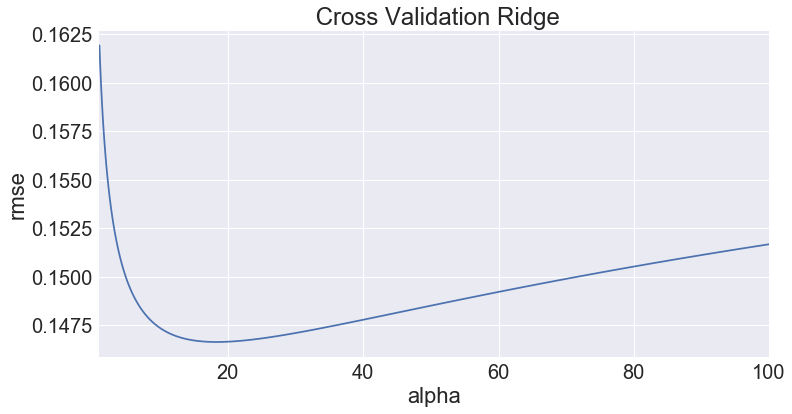

In [103]:
sns.set(font_scale= 2.0) 
mpl.rcParams['figure.figsize'] = (12.0, 6.0)
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = " Cross Validation Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [84]:
#Best alpha and rmse
best =cv_ridge[cv_ridge == cv_ridge.min()]
best_alpha = best.index[0]
print(best_alpha)

18.7381742286


In [85]:
#Fitting to entire training subset using best alpha
Ridge_best = Ridge(alpha = best_alpha)
Ridge_best.fit(X_train, y_train)
print("Ridge training R-squared is: %f" %Ridge_best.score(X_train, y_train))

y_predicted_train = Ridge_best.predict(X_train)
mse_train = mean_squared_error(y_train, y_predicted_train)
rms_train = np.sqrt(mean_squared_error(y_train, y_predicted_train))
print("Ridge training RMSE is: %f" %rms_train)

Ridge training R-squared is: 0.937544
Ridge training RMSE is: 0.100949


In [86]:
#Test model against test set. 

y_predicted_test = Ridge_best.predict(X_test)
mse_test = mean_squared_error(y_test, y_predicted_test)
rms_test = np.sqrt(mean_squared_error(y_test, y_predicted_test))
print("Ridge test R-squared is: %f" %Ridge_best.score(X_test, y_test))
print("Ridge test RMSE is: %f" %rms_test)

Ridge test R-squared is: 0.912677
Ridge test RMSE is: 0.111324


In [87]:
#Fitting to entire training set
Ridge_final = Ridge(alpha = best_alpha)
Ridge_final.fit(train, y_log)
print("Ridge R-squared on entire training set is: %f" %Ridge_best.score(train, y_log))

y_predicted = Ridge_final.predict(train)
mse = mean_squared_error(y_log, y_predicted)
rms = np.sqrt(mean_squared_error(y_log, y_predicted))
print("Ridg RMSE is: %f" %rms)

Ridge R-squared on entire training set is: 0.933326
Ridg RMSE is: 0.098549


In [88]:
Ridge_final.get_params()

{'alpha': 18.73817422860385,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [106]:
### create diction of features and coefficients
#coef_dictRidge = {}
#for coef, feat in zip(Ridge_final.coef_,X_kaggle.columns):
#    coef_dictRidge[feat] = coef
coef = pd.Series(Ridge_final.coef_, index = train.columns)   
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")


Ridge picked 963 variables and eliminated the other 223 variables


In [107]:
#Sort dictionary by coefficients from highest to lowest. In terms of absolute value, OverallQual+OverallCond
#appear to be very important
#from operator import itemgetter
#sorted(coef_dictRidge.items(), key=itemgetter(1), reverse = True)

imp_coef = pd.concat([coef.sort_values().head(5), coef.sort_values().tail(5)])
imp_coef.to_csv('imp_coef.csv')
imp_coef

OverallCond_3                                          -0.066691
Neighborhood + OverallQual + OverallCond_Edwards10+5   -0.066562
MSSubClass_160                                         -0.051320
Neighborhood_Edwards                                   -0.048231
Neighborhood + OverallQual + OverallCond_IDOTRR4+4     -0.048116
Neighborhood_Crawfor                                    0.048117
CentralAir_Y                                            0.049257
MSZoning_RL                                             0.053233
OverallQual                                             0.057236
Functional_Typ                                          0.057430
dtype: float64

# Scaled Lasso

In [91]:
# Create training and test sets

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y_log, test_size=0.2, random_state=8)

In [92]:
# LassoCV

alphas = np.logspace(-2, 0, 100)
cv_lasso = [rmse_cv(Lasso(alpha = alpha), X_train, y_train).mean() for alpha in alphas]
alphas

/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordin

/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordin

/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordin

/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordin

/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordin

/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordin

/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordin

/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordin

/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordin

array([ 0.01      ,  0.01047616,  0.01097499,  0.01149757,  0.01204504,
        0.01261857,  0.01321941,  0.01384886,  0.01450829,  0.01519911,
        0.01592283,  0.01668101,  0.01747528,  0.01830738,  0.0191791 ,
        0.02009233,  0.02104904,  0.02205131,  0.0231013 ,  0.02420128,
        0.02535364,  0.02656088,  0.02782559,  0.02915053,  0.03053856,
        0.03199267,  0.03351603,  0.03511192,  0.0367838 ,  0.03853529,
        0.04037017,  0.04229243,  0.04430621,  0.04641589,  0.04862602,
        0.05094138,  0.05336699,  0.0559081 ,  0.05857021,  0.06135907,
        0.06428073,  0.06734151,  0.07054802,  0.07390722,  0.07742637,
        0.08111308,  0.08497534,  0.08902151,  0.09326033,  0.097701  ,
        0.1023531 ,  0.10722672,  0.1123324 ,  0.1176812 ,  0.12328467,
        0.12915497,  0.13530478,  0.14174742,  0.14849683,  0.15556761,
        0.16297508,  0.17073526,  0.17886495,  0.18738174,  0.19630407,
        0.20565123,  0.21544347,  0.22570197,  0.23644894,  0.24

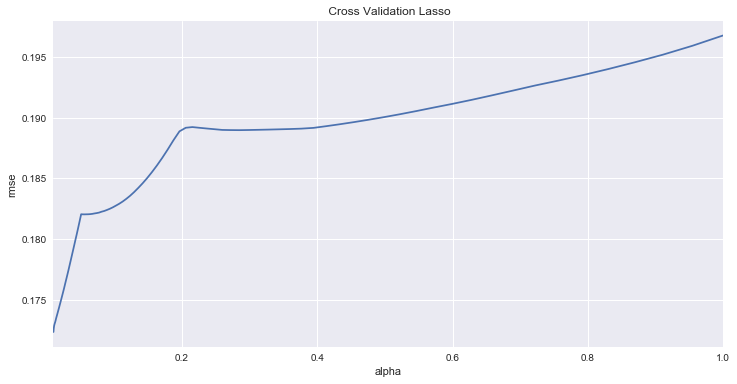

In [93]:
mpl.rcParams['figure.figsize'] = (12.0, 6.0)
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = " Cross Validation Lasso")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [94]:
#Best alpha and rmse
best = cv_lasso[cv_lasso == cv_lasso.min()]
best_alpha = best.index[0]
print(best_alpha)

0.01


In [95]:
#Fitting to entire training subset using alpha = .01
Lasso_best = Lasso(alpha = best_alpha)
Lasso_best.fit(X_train, y_train)
print("Lasso training R-squared is: %f" %Lasso_best.score(X_train, y_train))

y_predicted_train = Lasso_best.predict(X_train)
mse_train = mean_squared_error(y_train, y_predicted_train)
rms_train = np.sqrt(mean_squared_error(y_train, y_predicted_train))
print("Lasso training RMSE is: %f" %rms_train)

Lasso training R-squared is: 0.864502
Lasso training RMSE is: 0.148691


/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [96]:
#Testing against test set
y_predicted_test = Lasso_best.predict(X_test)
mse_test = mean_squared_error(y_test, y_predicted_test)
rms_test = np.sqrt(mean_squared_error(y_test, y_predicted_test))
print("Lasso test R-squared is: %f" %Lasso_best.score(X_test, y_test))
print("Lasso test RMSE is: %f" %rms_test)

Lasso test R-squared is: 0.845159
Lasso test RMSE is: 0.148241


In [97]:
#Fitting to entire training set.  
Lasso_final = Lasso(alpha = best_alpha)
Lasso_final.fit(train, y_log)
print("Lasso R-squared on entire training set is: %f" %Lasso_best.score(train, y_log))

y_predicted = Lasso_final.predict(train)
mse = mean_squared_error(y_log, y_predicted)
rms = np.sqrt(mean_squared_error(y_log, y_predicted))
print("Lasso RMSE is: %f" %rms)

Lasso R-squared on entire training set is: 0.861510
Lasso RMSE is: 0.147470


/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [98]:
### create diction of features and coefficients
#coef_dictLasso = {}
#for coef, feat in zip(Lasso_final.coef_,X_kaggle.columns):
#    coef_dictLasso[feat] = coef
coef = pd.Series(Lasso_final.coef_, index = train.columns) 
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +
      str(sum(coef == 0)) + " variables")

Lasso picked 30 variables and eliminated the other 1156 variables


In [99]:
#Sort dictionary by coefficients from highest to lowest
#from operator import itemgetter
#sorted(coef_dictLasso.items(), key=itemgetter(1), reverse = True)

imp_coef = pd.concat([coef.sort_values().head(5), coef.sort_values().tail(5)])
imp_coef

PoolArea                   -0.000094
TotalBaths * TotalSF       -0.000091
TotalSF                    -0.000086
HighQualFinishedSF         -0.000031
OpenPorchSF                -0.000010
YearBuilt                   0.001470
YearRemodAdd                0.002462
MSZoning_RL                 0.003525
Fireplaces                  0.011015
OverallQual * TotalBaths    0.042350
dtype: float64